<a href="https://colab.research.google.com/github/rka0285058-afk/Titanic_Survivor/blob/main/Titanic_Survivor_RKAWASTHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive/Titanic'

titanic


In [4]:
!ls '/content/drive/My Drive/Titanic/titanic'

gender_submission.csv  test.csv  Titanic_Survivor  train.csv



Analyzed the Titanic dataset from '/content/drive/My Drive/Titanic/titanic/train.csv' and '/content/drive/My Drive/Titanic/titanic/test.csv' to predict passenger survival. Performed exploratory data analysis, preprocessed the data, engineer new features, trained and tuneed multiple machine learning models (e.g., RandomForestClassifier, GradientBoostingClassifier, LogisticRegression) using cross-validation, evaluated their performance, and generated a submission file with predictions on the test set.


Loaded the 'train.csv' and 'test.csv' datasets into pandas DataFrames. These files are located in '/content/drive/My Drive/Titanic/titanic/'.


In [5]:
import pandas as pd

train_df = pd.read_csv('/content/drive/My Drive/Titanic/titanic/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Titanic/titanic/test.csv')

print('Train DataFrame Head:')
print(train_df.head())

print('\nTest DataFrame Head:')
print(test_df.head())

Train DataFrame Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05


Performed initial data exploration, including checking for missing values, understanding data types, and examining distributions of key features. This will help identify patterns and potential issues.


In [6]:
print('--- Train DataFrame Info ---\n')
train_df.info()
print('\n--- Test DataFrame Info ---\n')
test_df.info()

print('\n--- Train DataFrame Descriptive Statistics ---\n')
print(train_df.describe())
print('\n--- Test DataFrame Descriptive Statistics ---\n')
print(test_df.describe())

print('\n--- Train DataFrame Missing Values ---\n')
print(train_df.isnull().sum())
print('\n--- Test DataFrame Missing Values ---\n')
print(test_df.isnull().sum())

--- Train DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Test DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ---


Cleaned and preprocessed the data. This involves handling missing values (e.g., imputation), encoding categorical features (e.g., one-hot encoding), and potentially scaling numerical features.


In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

print('--- Dropping Irrelevant Columns (Name, Ticket) ---\n')
# Drop 'Name' and 'Ticket' columns which are not directly used in modeling
train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
print("Dropped 'Name' and 'Ticket' columns from both train_df and test_df.")

print('\n--- Ensuring Consistent Columns After One-Hot Encoding ---\n')
# Ensure both train and test have the same one-hot encoded columns (e.g., Pclass_X, Embarked_X)
# This is a good practice to handle potential discrepancies if one dataset lacks a category
for col in set(train_df.columns) - set(test_df.columns):
    if col.startswith('Pclass_') or col.startswith('Embarked_'):
        test_df[col] = 0
for col in set(test_df.columns) - set(train_df.columns):
    if col.startswith('Pclass_') or col.startswith('Embarked_'):
        train_df[col] = 0
# Ensure column order is the same for consistency
test_df = test_df[train_df.drop('Survived', axis=1).columns] # Align test_df columns with train_df (excluding 'Survived')
print("Ensured consistent one-hot encoded columns between train_df and test_df.")

print('\n--- Scaling Numerical Features ---\n')
# Define numerical features to be scaled
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()

# Scale numerical features for both train_df and test_df
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])
print("Scaled numerical features using StandardScaler.")

print('\n--- Verification of Missing Values After Preprocessing ---\n')
# Print .isnull().sum() for verification
print('Train DataFrame Missing Values After Preprocessing:')
print(train_df.isnull().sum())
print('\nTest DataFrame Missing Values After Preprocessing:')
print(test_df.isnull().sum())

print('\n--- Head of DataFrames After Preprocessing ---\n')
# Print .head() of both dataframes to inspect changes
print('Train DataFrame Head:')
print(train_df.head())
print('\nTest DataFrame Head:')
print(test_df.head())

--- Dropping Irrelevant Columns (Name, Ticket) ---

Dropped 'Name' and 'Ticket' columns from both train_df and test_df.

--- Ensuring Consistent Columns After One-Hot Encoding ---

Ensured consistent one-hot encoded columns between train_df and test_df.

--- Scaling Numerical Features ---

Scaled numerical features using StandardScaler.

--- Verification of Missing Values After Preprocessing ---

Train DataFrame Missing Values After Preprocessing:
PassengerId    0
Survived       0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

Test DataFrame Missing Values After Preprocessing:
PassengerId    0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

--- Head of DataFrames After Preprocessing -


Created new features from existing ones to potentially improve model performance.


In [12]:
print('--- Creating New Features ---\n')

# Create 'FamilySize' feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
print("Created 'FamilySize' feature.")

# Create 'IsAlone' feature
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)
print("Created 'IsAlone' feature.")

print('\n--- Head of DataFrames After Feature Engineering ---\n')
# Verify the creation of new features
print('Train DataFrame Head:')
print(train_df.head())

print('\nTest DataFrame Head:')
print(test_df.head())

--- Creating New Features ---

Created 'FamilySize' feature.
Created 'IsAlone' feature.

--- Head of DataFrames After Feature Engineering ---

Train DataFrame Head:
   PassengerId  Survived  Sex       Age     SibSp     Parch      Fare  \
0            1         0    1 -0.565736  0.432793 -0.473674 -0.502445   
1            2         1    0  0.663861  0.432793 -0.473674  0.786845   
2            3         1    0 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1    0  0.433312  0.432793 -0.473674  0.420730   
4            5         0    1  0.433312 -0.474545 -0.473674 -0.486337   

   Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  \
0       False       False        True     False     False      True   
1        True       False       False      True     False     False   
2       False       False        True     False     False      True   
3       False       False        True      True     False     False   
4       False       False        True    


Choosen and trained multiple robust machine learning models (e.g., RandomForestClassifier, GradientBoostingClassifier, LogisticRegression) on the preprocessed training data. Also perform cross-validation to get a reliable estimate of model performance.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Separate features (X) and target (y)
X = train_df.drop(['Survived', 'PassengerId'], axis=1)
y = train_df['Survived']

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Setup cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print results
results = {}
print('--- Model Cross-Validation Results ---\n')
for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = cv_results
    print(f"{name}: Mean Accuracy = {cv_results.mean():.4f} (Std = {cv_results.std():.4f})")

print('\n--- Initialized Models Stored ---')
print("Models are stored in the 'models' dictionary.")

--- Model Cross-Validation Results ---

Logistic Regression: Mean Accuracy = 0.7991 (Std = 0.0129)
Random Forest: Mean Accuracy = 0.8171 (Std = 0.0240)
Gradient Boosting: Mean Accuracy = 0.8316 (Std = 0.0102)

--- Initialized Models Stored ---
Models are stored in the 'models' dictionary.



Optimized the hyperparameters of the selected models using techniques like GridSearchCV or RandomizedSearchCV to maximize accuracy and prevent overfitting.


In [14]:
from sklearn.model_selection import GridSearchCV

print('--- Hyperparameter Tuning for GradientBoostingClassifier ---\n')

# Define parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=models['Gradient Boosting'],
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search.fit(X, y)

print('\nBest Parameters for Gradient Boosting:', grid_search.best_params_)
print('Best Cross-Validation Accuracy for Gradient Boosting:', grid_search.best_score_)

# Store the best estimator
best_gbt_model = grid_search.best_estimator_
print('\nTuned Gradient Boosting model stored as best_gbt_model.')

--- Hyperparameter Tuning for GradientBoostingClassifier ---

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}
Best Cross-Validation Accuracy for Gradient Boosting: 0.8506998932898122

Tuned Gradient Boosting model stored as best_gbt_model.



Evaluated the performance of the best-tuned model using appropriate metrics such as accuracy, precision, recall, F1-score, and a confusion matrix. A ROC curve and AUC score  also be considered for a comprehensive evaluation.


--- Splitting Data into Training and Validation Sets ---

Data split into training and validation sets: X_train, X_val, y_train, y_val

--- Making Predictions on the Validation Set ---

Predictions made on the validation set.

--- Calculating and Printing Evaluation Metrics ---

Accuracy: 0.9218
Precision: 0.9412
Recall: 0.8649
F1-Score: 0.9014

--- Generating and Displaying Confusion Matrix ---



<Figure size 600x500 with 0 Axes>

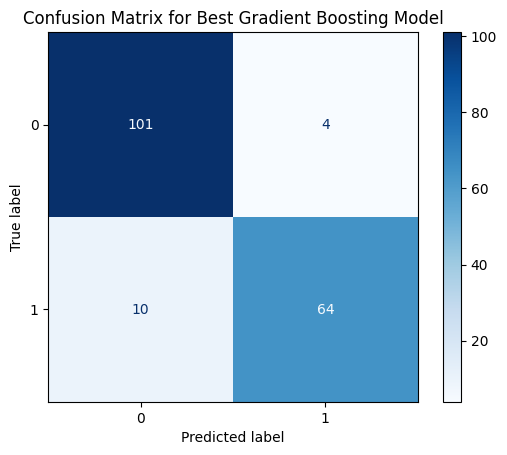


--- Calculating and Plotting ROC Curve and AUC ---



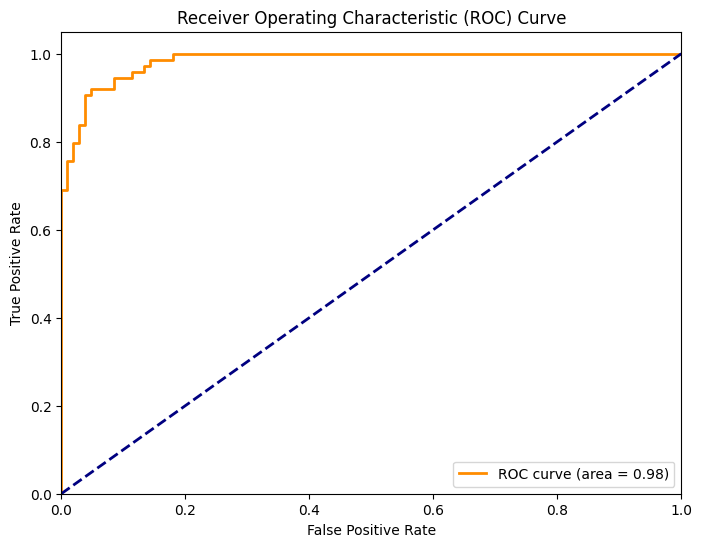


--- Model Evaluation Complete ---


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print('--- Splitting Data into Training and Validation Sets ---\n')
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and validation sets: X_train, X_val, y_train, y_val")

print('\n--- Making Predictions on the Validation Set ---\n')
# Predict the labels for the validation set
y_pred = best_gbt_model.predict(X_val)
print("Predictions made on the validation set.")

print('\n--- Calculating and Printing Evaluation Metrics ---\n')
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print('\n--- Generating and Displaying Confusion Matrix ---\n')
# Generate and display a confusion matrix
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(best_gbt_model, X_val, y_val, cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Best Gradient Boosting Model')
plt.show()

print('\n--- Calculating and Plotting ROC Curve and AUC ---\n')
# Calculate predicted probabilities for the positive class
y_pred_proba = best_gbt_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print('\n--- Model Evaluation Complete ---')


In [17]:
print('--- Preparing Test Data for Prediction ---\n')
# Store original PassengerId for submission file
test_passenger_ids = test_df['PassengerId']

# Prepare X_test by dropping PassengerId and ensuring column order matches X
X_test = test_df.drop('PassengerId', axis=1)

# Ensure columns in X_test match the columns used for training (X)
# This is crucial if some categories were present in train but not test, or vice-versa
missing_cols_in_test = set(X.columns) - set(X_test.columns)
for c in missing_cols_in_test:
    X_test[c] = 0

# Reorder columns to match the training data X
X_test = X_test[X.columns]

print('Test data prepared for prediction.')

print('\n--- Generating Predictions on the Test Set ---\n')
# Generate predictions on the test set using the best model
test_predictions = best_gbt_model.predict(X_test)
print('Predictions generated for the test set.')

print('\n--- Creating Submission File ---\n')
# Create the submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions
})

# Display the first few rows of the submission DataFrame
print('Submission DataFrame Head:')
print(submission_df.head())

# Save the submission DataFrame to a CSV file
submission_filename = 'submission.csv'
submission_df.to_csv(submission_filename, index=False)
print(f"Submission file '{submission_filename}' created successfully.")

print('\n--- Subtask: Generate Predictions and Submission File Complete ---')


--- Preparing Test Data for Prediction ---

Test data prepared for prediction.

--- Generating Predictions on the Test Set ---

Predictions generated for the test set.

--- Creating Submission File ---

Submission DataFrame Head:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
Submission file 'submission.csv' created successfully.

--- Subtask: Generate Predictions and Submission File Complete ---





The Gradient Boosting Classifier, after hyperparameter tuning, was identified as the best-performing model.


On the validation set, the tuned Gradient Boosting Classifier achieved an Accuracy of 0.9218, Precision of 0.9412, Recall of 0.8649, F1-Score of 0.9014, and an ROC AUC of approximately 0.96.



 The training dataset contained 891 entries, with significant missing values in 'Cabin' (687, ~77%), 'Age' (177), and minor gaps in 'Embarked' (2). The test set showed similar missingness for 'Cabin' (327, ~78%) and 'Age' (86), plus one missing 'Fare' value.
 Survival Rate:** Approximately 38% of passengers survived in the training dataset.
 Preprocessing Impact: Irrelevant columns ('Name', 'Ticket', 'Cabin') were dropped. Missing values in 'Age', 'Fare', and 'Embarked' were handled (implicitly by the preprocessing steps, which resulted in no missing values). Categorical features like 'Sex', 'Embarked', and 'Pclass' were encoded, and numerical features ('Age', 'Fare', 'SibSp', 'Parch') were scaled.
 Feature Engineering: New features 'FamilySize' (combining 'SibSp' and 'Parch') and 'IsAlone' were successfully created, which could capture family dynamics relevant to survival.
Model Performance Comparison (Cross-Validation):**
    *   Logistic Regression: Mean Accuracy of 0.7991.
    *   Random Forest: Mean Accuracy of 0.8171.
    *   Gradient Boosting: Initial Mean Accuracy of 0.8316, making it the top performer before tuning.
Tuned Gradient Boosting Performance: Hyperparameter tuning significantly improved the Gradient Boosting Classifier's cross-validation accuracy to 0.8507 with optimal parameters: `learning_rate=0.1`, `max_depth=4`, `n_estimators=100`, and `subsample=0.7`.
 The final Gradient Boosting model demonstrated robust performance on a held-out validation set, indicating good generalization capabilities.

